In [31]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

Alice wants to use SARG04 protocol to send a secret to Bob.

Alice starts with preparing 2 strings:
- $x = 101$ that represent the actual information she wants to send to Bob
- $y = 101$ that tells Alice which bases to apply on each bit of $x$

Bob prepares a random $\overline{y} = 100$ ($q_6, q_7, q_8$) basis state that is also n-qubits long, and use that state to measure each $x_i$ based $\overline{y}_i$ basis

Both Bob and Alice know that each qubit is encoded in one of 2 basis:
- $H$ basis if $y = 1$
- $Z$ basis if $y = 0$

In [32]:
qubits = {
    # Alice information qubits
    "q0": QuantumRegister(1, "q0"),
    "q1": QuantumRegister(1, "q1"),
    "q2": QuantumRegister(1, "q2"),
    
    # Alice bases qubits
    "q3": QuantumRegister(1, "q3"),
    "q4": QuantumRegister(1, "q4"),
    "q5": QuantumRegister(1, "q5"),

    # Bob qubits
    "q6": QuantumRegister(1, "q6"),
    "q7": QuantumRegister(1, "q7"),
    "q8": QuantumRegister(1, "q8"),

    # Output
    "output": ClassicalRegister(3, "output")
}

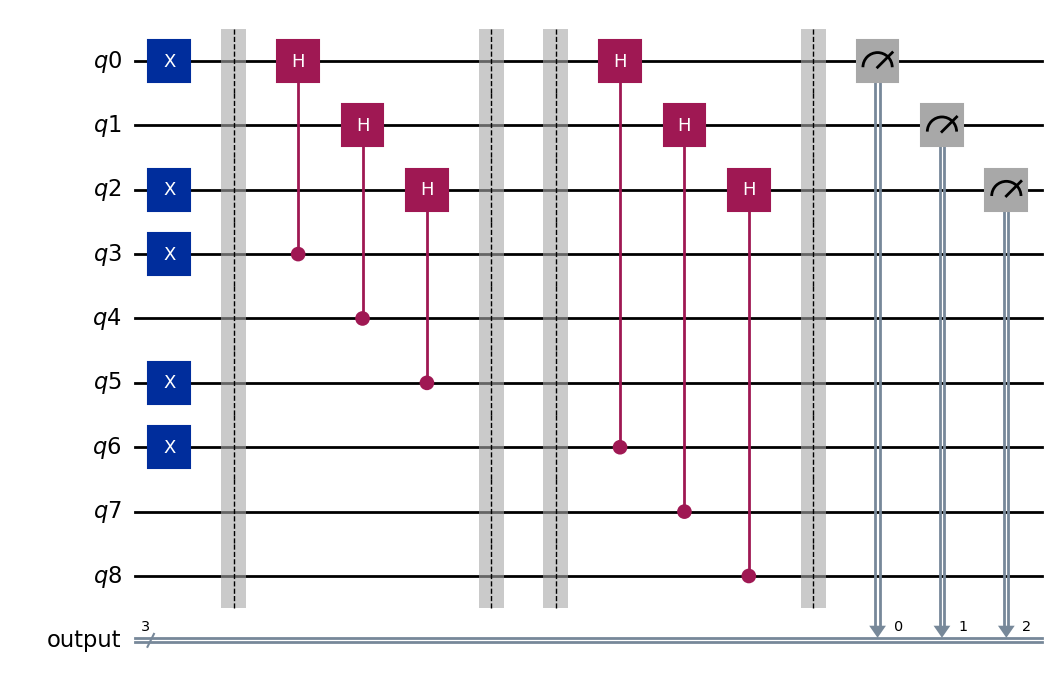

In [33]:
qc = QuantumCircuit(*qubits.values())

# prepare information state for Alice
# x = 101
qc.x(qubits["q0"])
qc.x(qubits["q2"])

# prepare basis state 101 for Alice (H, C, H)
# y = 101
qc.x(qubits["q3"])
qc.x(qubits["q5"])

# prepare reference basis state for Bob
# y' = 100
qc.x(qubits["q6"])

qc.barrier()

# Alice encodes information state based on basis state
# Encoding
qc.ch(qubits["q3"], qubits["q0"])
qc.ch(qubits["q4"], qubits["q1"])
qc.ch(qubits["q5"], qubits["q2"])

qc.barrier()
qc.barrier()

# Bob tries to measure information state based on his basis state
# Decoding
qc.ch(qubits["q6"], qubits["q0"])
qc.ch(qubits["q7"], qubits["q1"])
qc.ch(qubits["q8"], qubits["q2"])

qc.barrier()

qc.measure([0, 1, 2], qubits["output"])

qc.draw("mpl")

In [34]:
backend = AerSimulator()
qc_aer = transpile(qc, backend)

result = backend.run(qc_aer, shots=8192).result()

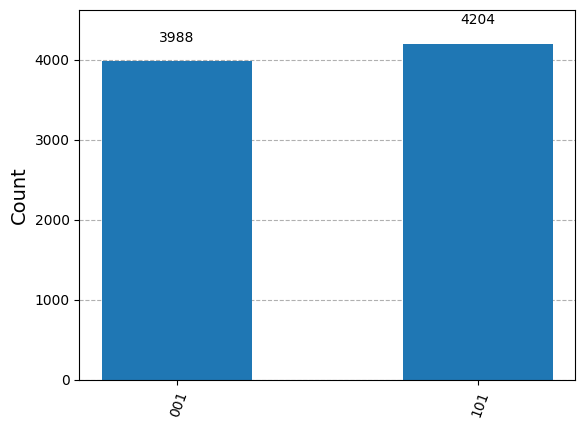

In [35]:
plot_histogram(result.get_counts())

The probability of getting $q_0 = \ket{1}$ and $q_1 = \ket{0}$ is $100\%$.

While there is $50\%$ chance that $q_2$ is either $\ket{0}$ or $\ket{1}$ because there is a mismatch in Bob's measurement's basis, Alice encoded it in Hadamard basis and Bob did measure in computational basis.